In [ ]:
#!pip install numpy pandas matplotlib scikit-learn tensorflow keras opencv-python scikit-image ipywidgets swifter

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [ ]:
'''
sources

https://stackoverflow.com/questions/21061814/how-can-i-read-an-image-from-an-internet-url-in-python-cv2-scikit-image-and-mah
https://stackoverflow.com/questions/22081209/find-the-root-of-the-git-repository-where-the-file-lives
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html
https://www.geeksforgeeks.org/python-change-column-names-and-row-indexes-in-pandas-dataframe/
https://github.com/jmcarpenter2/swifter
https://stackoverflow.com/questions/67183501/setting-an-array-element-with-a-sequence-requested-array-has-an-inhomogeneous-sh

'''

'\nsources\n\nhttps://stackoverflow.com/questions/21061814/how-can-i-read-an-image-from-an-internet-url-in-python-cv2-scikit-image-and-mah\nhttps://stackoverflow.com/questions/22081209/find-the-root-of-the-git-repository-where-the-file-lives\nhttps://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html\nhttps://www.geeksforgeeks.org/python-change-column-names-and-row-indexes-in-pandas-dataframe/\nhttps://github.com/jmcarpenter2/swifter\nhttps://stackoverflow.com/questions/67183501/setting-an-array-element-with-a-sequence-requested-array-has-an-inhomogeneous-sh\n\n'

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import requests
import matplotlib.pyplot as plt
from skimage import io
from tqdm.auto import tqdm
import concurrent.futures
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

tqdm.pandas()



In [ ]:
def convert_image_url_into_numpy_array(url):
    img = io.imread(url)
    return img


directory = {}
repo_url = "https://api.github.com/repos/yiweichen04/retina_dataset/contents"
token = ''
headers = {'Authorization': f'token {token}'}

Url = 'https://github.com/yiweichen04/retina_dataset/blob/master/dataset/1_normal/NL_001.png?raw=true'

#image = convert_image_url_into_numpy_array(Url)

In [ ]:
def fetch_contents(url, direct, level=0, headers=None):
    temp = []
    response = requests.get(url, headers=headers)
    contents = response.json()

    if response.status_code != 200:
        print(f"Error: {response.status_code}")
        return

    for item in contents:
        #print(' ' * level * 2 + item['name'])
        if item['type'] == 'dir':
            direct[item['name']] = {}
            fetch_contents(item['url'], direct[item['name']], level + 1, headers)
        else:
            temp.append(item['name'])
    
    if temp:
        direct['contents'] = temp     

In [ ]:
fetch_contents(repo_url, directory, headers=headers)

In [ ]:
keys = directory['dataset'].keys()


for x in directory['dataset'].keys():
    for y in directory['dataset'][x]['contents']:
        print(x,y)

1_normal NL_001.png
1_normal NL_002.png
1_normal NL_003.png
1_normal NL_004.png
1_normal NL_005.png
1_normal NL_006.png
1_normal NL_007.png
1_normal NL_008.png
1_normal NL_009.png
1_normal NL_010.png
1_normal NL_011.png
1_normal NL_012.png
1_normal NL_013.png
1_normal NL_014.png
1_normal NL_015.png
1_normal NL_016.png
1_normal NL_017.png
1_normal NL_018.png
1_normal NL_019.png
1_normal NL_020.png
1_normal NL_021.png
1_normal NL_022.png
1_normal NL_023.png
1_normal NL_024.png
1_normal NL_025.png
1_normal NL_026.png
1_normal NL_027.png
1_normal NL_028.png
1_normal NL_029.png
1_normal NL_030.png
1_normal NL_031.png
1_normal NL_032.png
1_normal NL_033.png
1_normal NL_034.png
1_normal NL_035.png
1_normal NL_036.png
1_normal NL_037.png
1_normal NL_038.png
1_normal NL_039.png
1_normal NL_040.png
1_normal NL_041.png
1_normal NL_042.png
1_normal NL_043.png
1_normal NL_044.png
1_normal NL_045.png
1_normal NL_046.png
1_normal NL_047.png
1_normal NL_048.png
1_normal NL_049.png
1_normal NL_050.png


In [ ]:
dataset = [(y,x) for x in directory['dataset'].keys() for y in directory['dataset'][x]['contents']]

dataset = pd.DataFrame(dataset, columns=("Image", "Classification"))
dataset


,Image,Classification
0,NL_001.png,1_normal
1,NL_002.png,1_normal
2,NL_003.png,1_normal
3,NL_004.png,1_normal
4,NL_005.png,1_normal
...,...,...
596,Retina_096.png,3_retina_disease
597,Retina_097.png,3_retina_disease
598,Retina_098.png,3_retina_disease
599,Retina_099.png,3_retina_disease


In [ ]:
def convert_filename_to_link(name, classification):
    if name != None:
        link =  f'https://github.com/yiweichen04/retina_dataset/blob/master/dataset/{classification}/{name}?raw=true'
        return convert_image_url_into_numpy_array(link)
        
    

In [ ]:
# Function to process each row
def process_row(row):
    return convert_filename_to_link(row['Image'], row['Classification'])

# Use concurrent.futures to parallelize the processing
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Convert dataframe to list of dicts
    rows = dataset.to_dict(orient='records')
    # Use tqdm to show progress bar
    results = list(tqdm(executor.map(process_row, rows), total=len(rows)))

# Assign results back to dataframe
dataset['Image'] = results

  0%|          | 0/601 [00:00<?, ?it/s]

In [ ]:
#for column in dataset.columns:
#        #dataset[column] = dataset[column].apply(lambda x: convert_filename_to_link(column, x))
#        dataset[column] = [convert_filename_to_link(column, x) for x in tqdm(dataset[column])]


#dataset['Image'] = dataset.progress_apply(lambda row: convert_filename_to_link(row['Image'], row['Classification']), axis=1)

#dataset

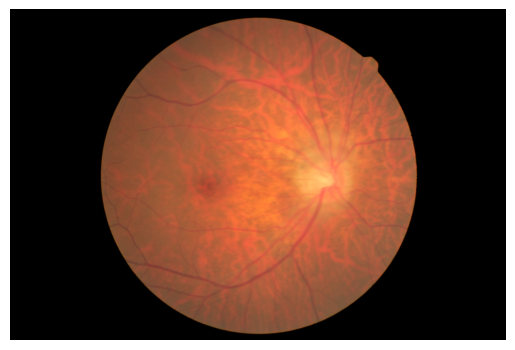

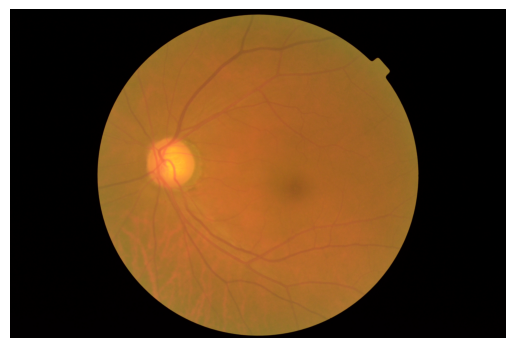

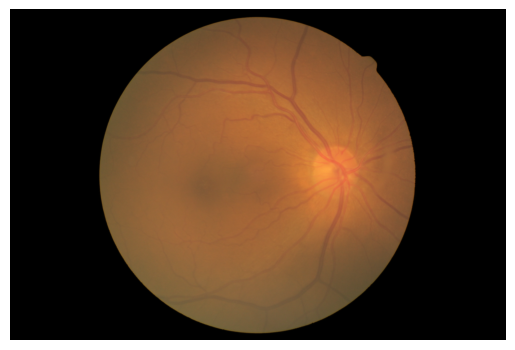

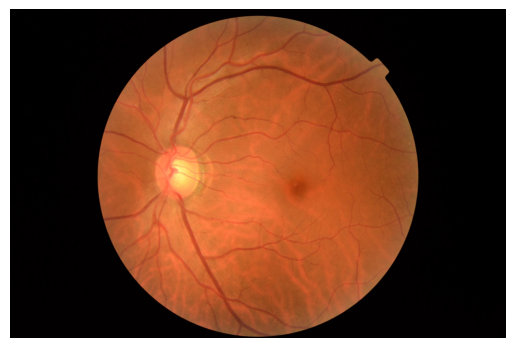

In [ ]:
def show_img(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

for x in dataset['Image'].sample(2):
    show_img(x)

In [ ]:
label_encoder = LabelEncoder()
dataset['Classification'] = label_encoder.fit_transform(dataset['Classification'])

In [ ]:
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=42)

#train_images = np.array(train_df['Image'].tolist(), dtype=np.uint8)
#test_images = np.array(test_df['Image'].tolist(), dtype=np.uint8)
#train_labels = np.array(train_df['Classification'].tolist(), dtype=np.uint8)
#test_labels = np.array(test_df['Classification'].tolist(), dtype=np.uint8)

In [ ]:
train_df

,Image,Classification
9,"[[[1, 0, 0], [1, 0, 0], [1, 0, 1], [2, 0, 1], ...",0
375,"[[[0, 1, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1], ...",1
523,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3
188,"[[[0, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0], ...",0
131,"[[[1, 1, 1], [1, 1, 1], [0, 0, 0], [1, 1, 1], ...",0
...,...,...
71,"[[[2, 0, 1], [2, 0, 1], [3, 0, 1], [3, 0, 1], ...",0
106,"[[[0, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
270,"[[[0, 1, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
435,"[[[0, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2


In [ ]:
test_df

In [ ]:
target_size = (128, 128)

def preprocess_image(image, target_size=target_size):

    image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray)
    norm_img = cv2.normalize(enhanced_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return norm_img

In [ ]:
train_images = np.array([preprocess_image(img) for img in tqdm(train_df['Image'])], dtype=np.uint8)
test_images = np.array([preprocess_image(img) for img in tqdm(test_df['Image'])], dtype=np.uint8)

  0%|          | 0/480 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

In [ ]:
# Ensure that labels are numpy arrays of appropriate type
train_labels = np.array(train_df['Classification'].tolist(), dtype=np.int64)
test_labels = np.array(test_df['Classification'].tolist(), dtype=np.int64)

In [ ]:
height, width = target_size
train_images = train_images.reshape(-1, height, width, 1)
test_images = test_images.reshape(-1, height, width, 1)

In [ ]:
# Define the image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
height, width = target_size
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Assuming binary classification (0 or 1)
])

c:\Users\Panpan Salacut\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=100, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.2142 - loss: 259.1270 - val_accuracy: 0.1405 - val_loss: -16.2865
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.1773 - loss: 63.7244 - val_accuracy: 0.1405 - val_loss: -20.6063
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.1650 - loss: 20.6602 - val_accuracy: 0.1405 - val_loss: -17.8299
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.1713 - loss: 114.0804 - val_accuracy: 0.1405 - val_loss: -7.9451
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.1756 - loss: 16.2766 - val_accuracy: 0.1405 - val_loss: -6.5469
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.1708 - loss: -9.6391 - val_accuracy: 0.1405 - val_loss: -5.8181
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.1908 - loss: 6.1232 - val_accuracy: 0.1405 - val_loss: -3.6712
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.1720 - loss: -12.411